In [2]:
#Supporting packages for analysis
import numpy as np
import pandas as pd

#KSTAR imports
from kstar import config
from kstar.plot import DotPlot

import conf #This is the local config file for setting the supplements directory to your local environment


#Set matplotlib defaults for arial 12 point font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 12
import matplotlib.pyplot as plt

#Directory where KSTAR Supplemental data was set 
odir = '../EGF_HMEC'

#load the Mann Whitney activities and FPR for Tyrosine predictions, 
#it will be faster and less data than loading all KSTAR outputs
activities = pd.read_csv(odir+'/RESULTS/EGF_HMEC_Y_mann_whitney_activities.tsv', sep='\t', index_col=0)
fpr = pd.read_csv(odir+'/RESULTS/EGF_HMEC_Y_mann_whitney_fpr.tsv', sep='\t', index_col=0)


        
#set preferred kinase names (make a kinase_dict)
kinase_dict = {}
for kinase in activities.index:
    kinase_dict[kinase] = conf.KINASE_MAP.loc[kinase,'Preferred Name']

In [ ]:
results = activities
results = -np.log10(results)


fig, axes = plt.subplots(figsize = (9,12), 
        nrows = 1, ncols = 2, 
        sharex = 'col', 
        sharey = 'row',
        gridspec_kw = {
            'width_ratios':[0.1,1]
        },)
fig.subplots_adjust(wspace=0, hspace=0)

dots = DotPlot(results, 
                       fpr, 
                       figsize = (9,12), 
                       dotsize = 10, 
                       legend_title='-log10(p-value)', 
                      kinase_dict=kinase_dict)


dots.cluster(orientation = 'left', ax = axes[0], method='ward')

dots.dotplot(ax = axes[1])
plt.xlabel('Time', FontSize=12)
plt.xticks(rotation = 45, FontSize=12)
plt.yticks(FontSize=12)
plt.savefig(odir+'EGF_HMEC_all.pdf', bbox_inches='tight')

/anaconda3/envs/py37-kstar/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/anaconda3/envs/py37-kstar/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


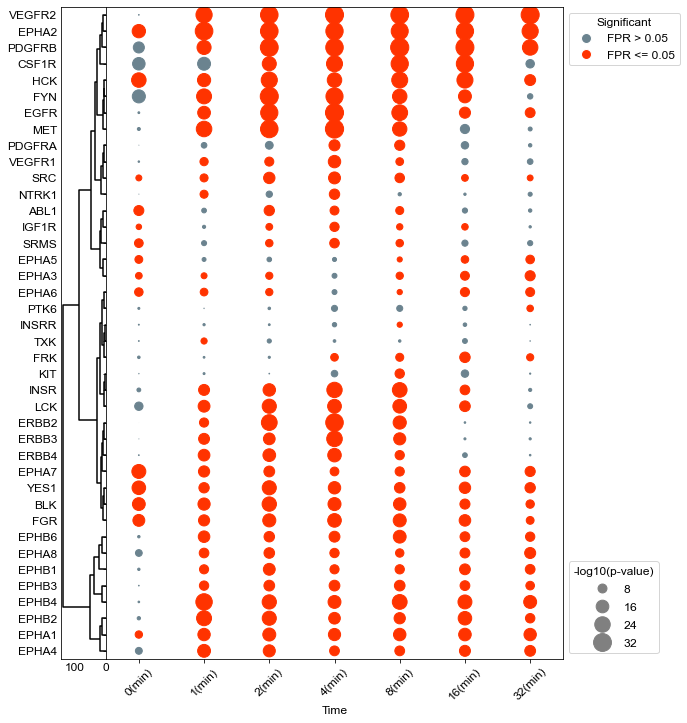

In [3]:
results = activities
results = -np.log10(results)

fig, axes = plt.subplots(figsize = (9,12), 
        nrows = 1, ncols = 2, 
        sharex = 'col', 
        sharey = 'row',
        gridspec_kw = {
            'width_ratios':[0.1,1]
        },)
fig.subplots_adjust(wspace=0, hspace=0)

dots = DotPlot(results, 
                       fpr, 
                       figsize = (9,12), 
                       dotsize = 10, 
                       legend_title='-log10(p-value)', 
                      kinase_dict=kinase_dict)

dots.drop_kinases_with_no_significance()

dots.cluster(orientation = 'left', ax = axes[0], method='ward')

dots.dotplot(ax = axes[1])
plt.xlabel('Time', FontSize=12)
plt.xticks(rotation = 45, FontSize=12)
plt.yticks(FontSize=12)
plt.savefig(odir+'EGF_HMEC_sigKinases.pdf', bbox_inches='tight')

<ipython-input-24-591388fd3d3a>:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Time', FontSize=12)
<ipython-input-24-591388fd3d3a>:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(rotation = 45, FontSize=12)
<ipython-input-24-591388fd3d3a>:23: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.yticks(FontSize=12)


(array([ 5, 15]), [Text(0, 5, 'ERBB2'), Text(0, 15, 'EGFR')])

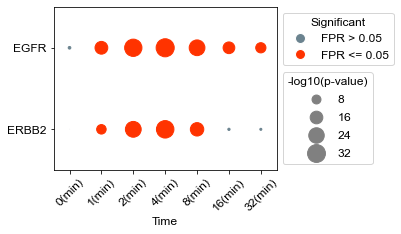

In [24]:
results = activities
results = -np.log10(results)
kinases = list(results.index)
kinases.remove('EGFR')
rtrim = results.loc[['EGFR', 'ERBB2']]
ftrim = fpr.loc[['EGFR', 'ERBB2']]

fig, axes = plt.subplots(figsize = (4,3))
fig.subplots_adjust(wspace=0, hspace=0)

dots = DotPlot(rtrim, 
                       ftrim, 
                       figsize = (6,8), 
                       dotsize = 10, 
                       legend_title='-log10(p-value)', 
                      kinase_dict=kinase_dict)



dots.dotplot(ax = axes)
plt.xlabel('Time', FontSize=12)
plt.xticks(rotation = 45, FontSize=12)
plt.yticks(FontSize=12)